<a href="https://colab.research.google.com/github/younghun-cha/Healthcare-Big-Data-Engineer/blob/main/AI/03-Machine_Learning/01_Multiple%2BLinear%2BRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Multiple Linear Regression
- 1개 이상의 X (feature variable)와 Y (response variable)로 구성된 Regression

## 1. Importing and Understanding Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
advertising_multi = pd.read_csv('../dataset/tv-advertising.csv')
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
advertising_multi.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## 2. Visualising Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

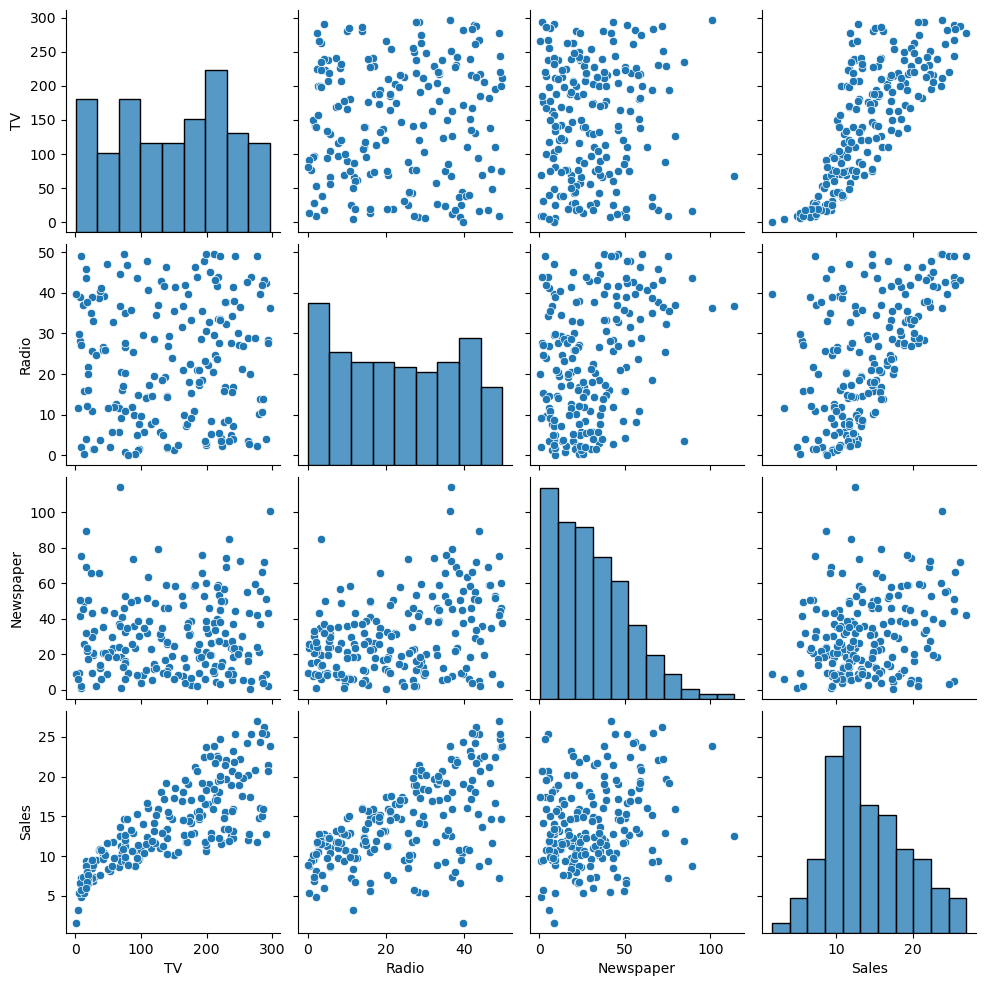

In [ ]:
# pairplot
sns.pairplot(advertising_multi)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


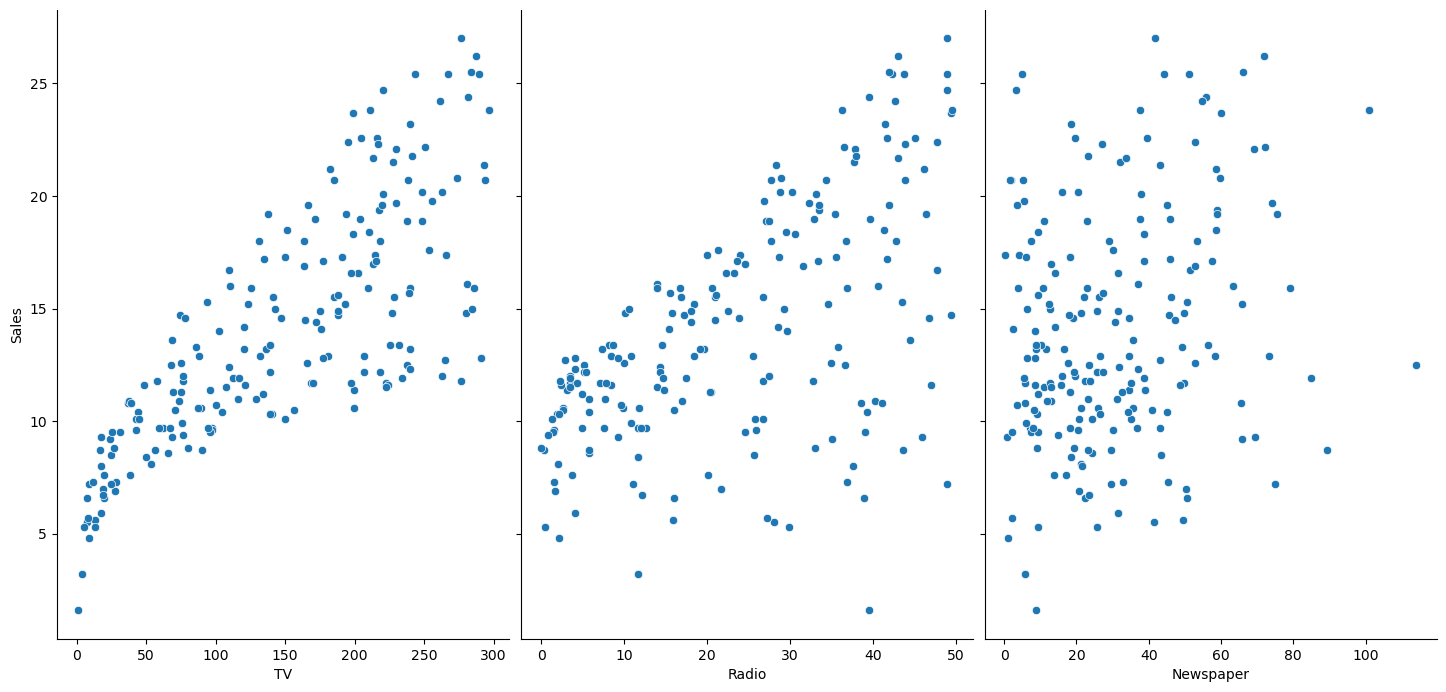

In [ ]:
# the features와 response의 관계를 scatterplot으로 그리기
sns.pairplot(advertising_multi, x_vars=['TV','Radio','Newspaper'], y_vars='Sales' ,
             size=7, aspect=0.7, kind='scatter')

## 3. Splitting Train/Test set

In [ ]:
# feature variable to X
X = advertising_multi[['TV','Radio','Newspaper']]

# response target variable to y
y = advertising_multi['Sales']

In [ ]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7 , 
                                                    random_state=100)
X_train.shape, X_test.shape

((140, 3), (60, 3))

## 4. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression lr(Creating LinearRegression Object)
lm = LinearRegression()

In [ ]:
# fit the model to the training data
lm.fit(X_train, y_train)

LinearRegression()

## 5. Model Evaluation

In [ ]:
# print the intercept(절편)
print(lm.intercept_)

2.652789668879498


In [ ]:
lm.coef_

array([0.0454256 , 0.18975773, 0.00460308])

In [ ]:
# coefficient(상관계수)
coeff_df = pd.DataFrame(lm.coef_, X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


- 회귀식: y = 2.652 + 0.045426 x TV + 0.189758 x Radio + 0.004603 x Newspaper
- 위의 결과로 TV marketing price가 증가할 수록 sales 매출은 0.045대씩 증가한다는 것을 예측 가능

## 6. Predictions

In [ ]:
y_pred = lm.predict(X_test)

## 7. Evalutaiton MSE, R^2

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate(y_pred):
    print('* MAE:', mean_absolute_error(y_test, y_pred))
    print('* RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('* R_Sqare:', r2_score(y_test, y_pred))
    print('* MAPE:', mean_absolute_percentage_error(y_test, y_pred))

In [ ]:
evaluate(y_pred)

* MAE: 1.0638483124072022
* RMSE: 1.3603977338130544
* R_Sqare: 0.9058622107532247
* MAPE: 0.09434088571100317


## 8. Regression Optional Step

### 8.1 P-value Using statsmodels

In [ ]:
#!pip install statsmodels

In [ ]:
# statsmodels.api modeling 활용
import statsmodels.api as sm

In [ ]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)

lm_1 = sm.OLS(y_train,X_train_sm).fit()

In [ ]:
lm_1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [ ]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 03 May 2023   Prob (F-statistic):           9.97e-66
Time:                        17:41:55   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

### 8.2 Correlation Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

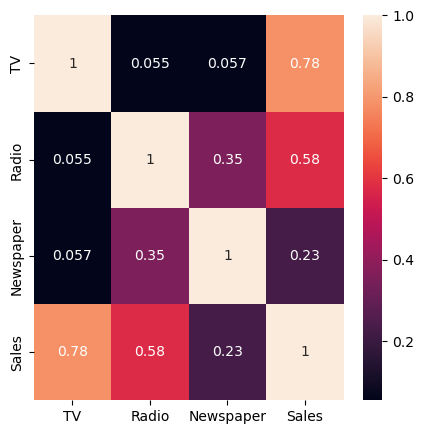

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(advertising_multi.corr(),annot = True)

### 8.3 : Re-running model

In [ ]:
# 'Newspaper' columns을 삭제
X_train_new = X_train[['TV', 'Radio']]
X_test_new = X_test[['TV', 'Radio']]

In [ ]:
# Model building
lm.fit(X_train_new,y_train)

LinearRegression()

In [ ]:
# predictions
y_pred_new = lm.predict(X_test_new)

#### Acutal vs Prediction 시각화

Text(0, 0.5, 'Sales')

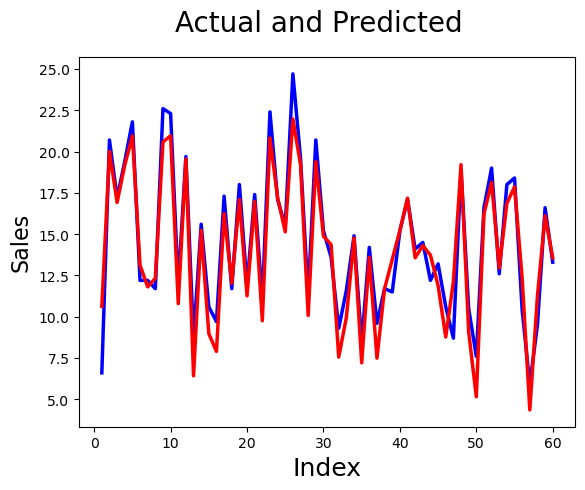

In [ ]:
#Actual vs Predicted
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               # Y-label

#### Error Terms 시각화

Text(0, 0.5, 'ytest-ypred')

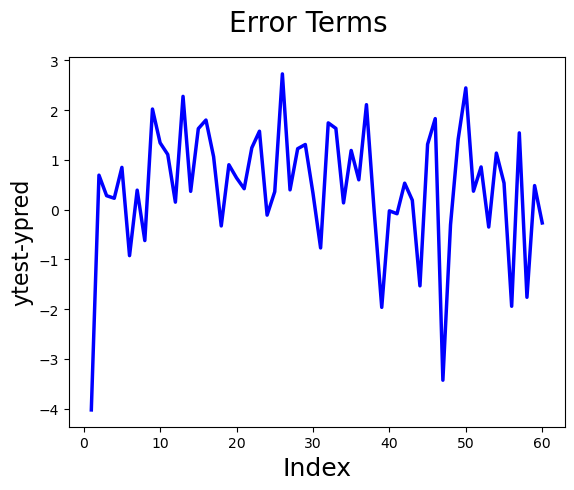

In [ ]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

#### Calculating Evalutaiton MES, R^2

In [ ]:
y_pred

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

In [ ]:
y_pred_new

array([10.56198847, 20.16735504, 16.90186462, 19.07993718, 21.03892699,
       13.13621118, 11.80982028, 12.39007729, 20.59914742, 21.04083466,
       10.88508869, 19.38624121,  6.37517955, 15.33164571,  8.96088175,
        7.95144449, 16.38791571, 11.97017124, 17.24725749, 11.20901475,
       17.11470022,  9.70819803, 20.79788275, 17.20749366, 15.18035107,
       22.18189008, 19.17555656, 10.05518823, 19.5883307 , 14.98424867,
       14.39922454,  7.65095995,  9.84543862, 14.78150095,  7.22855505,
       13.69168479,  7.43358375, 11.75347003, 13.50004784, 15.057806  ,
       17.06957807, 13.68351323, 14.23222825, 13.70744537, 11.96487996,
        8.70898678, 11.90028246, 19.26409026,  9.01348371,  5.17060846,
       16.23196722, 18.16063096, 12.87565806, 16.92691617, 17.99125313,
       12.31004629,  4.29140991, 11.39172539, 16.20134352, 13.51229884])

In [ ]:
evaluate(y_pred_new)

* MAE: 1.0397500099187895
* RMSE: 1.3359416349864541
* R_Sqare: 0.909216449171822
* MAPE: 0.09301346546190206


### 8.4 Checking for P-value Using statsmodels

In [ ]:
X_train_final = X_train_new

X_train_final = sm.add_constant(X_train_final)
lm_final = sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Wed, 03 May 2023   Prob (F-statistic):           4.46e-67
Time:                        17:41:58   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

## 9. RFE(Recursive Feature Elimination)
- RFE(Recursive Feature Elimination)는  Backward 방식중 하나로, 모든 변수를 우선 다 포함시킨 후 반복해서 학습을 진행하면서 중요도가 낮은 변수를 하나씩 제거하는 방식

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(lm, n_features_to_select=2)

In [ ]:
rfe = rfe.fit(X_train, y_train)

In [ ]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


In [ ]:
X_test.shape

(60, 3)

In [ ]:
y_pred_rfe = rfe.predict(X_test)

In [ ]:
evaluate(y_pred_rfe)

* MAE: 1.0397500099187895
* RMSE: 1.3359416349864541
* R_Sqare: 0.909216449171822
* MAPE: 0.09301346546190206
